<a name="top"></a>
<div style="width:600 px">

<div style="float:right; width:340 px; height:300px;">
<img src="https://raw.githubusercontent.com/unidata/drilsdown/master/docs/_static/DRILSDOWN_logo.png" alt="DRILSDOWN Logo" style="height: 300px;">
</div>

<div style="float:right; width:98 px; height:98px;">
<img src="https://www.earthcube.org/sites/default/files/doc-repository/logo_earthcube_cube-only_SMALL.png" alt="Earthcube Logo" style="height: 98px;">
</div>


<h1>Understanding eddy momentum flux I: Plan views (maps)</h1>
<h3>from 7km G5NR data, using G5NRutils.py</h3>
<h4>Suvarchal Cheedela and Brian Mapes, Oct 2017</h4>

Part of [this nbviewer repo](http://nbviewer.jupyter.org/github/suvarchal/G5NR_Interactive_notebooks/tree/master/)

-------------

<div style="clear:both"></div>
</div>

<hr style="height:2px;">


### Sections
<a href="#open_casefile">Open your case file (.zidv)</a>
1. <a href="#first_interactive">First interactive: u,v,w,  uw,vw,uv</a>
2. <a href="#second_interactive">Second: u',v',w', u'w', v'w',u'v'</a>
3. <a href="#third_interactive">Third: SKEdot as a function of resolution</a>
4. <a href="#fourth_interactive">Fourth: Hover to see value</a>


----------
#### Geoviews is an Earth-specific Holoviews. It displays 1-2 dimensions of a multi-dimensional object, and the other dims become interactive sliders.
#### xarray is the netCDF-friendly front end for reading in the data. Cartopy has the background maps. 

In [9]:
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs as ccrs
import xarray as xr
import numpy as np
from datetime import datetime
import G5NR_utils

#### Bokeh is a plotting package with pan-zoom interactivity 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
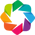

In [10]:
hv.notebook_extension('bokeh') #other backend is matplotlib but can be changed on the fly just before plottting

<a name="open_casefile"></a>

### Open your 3D data set for a case, as an xarray *dataset* object

In [11]:
# 7km data grids in local dir from unzipping of .zidv bundle

#xrdata_3d = xr.open_dataset('data_0_3D7km30minuteInst.nc')

%reload_ext ipython_IDV
xrdata_3d = xr.from_zidv('data/ZIDV_cases/skedot_15.4_lat_28.6_lon_152.0_time_200505160230.zidv')

### Or, if you have no data locally,
# load from a zidv bundle
#import G5NR_utils
#xrdata_3d= G5NR_utils.load_from_zidv('http://weather.rsmas.miami.edu/repository/entry/get/skedot_10.5_lat_40.9_lon_-64.0_time_200508120330.zidv?entryid=a5d8d9fb-0eb1-49bc-9378-a1dd70709dc4')
# remote whole dataset 
#xrdata_3d = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:1142722f-a386-4c17-a4f6-0f685cd19ae3:L0c1TlIvR0VPUzUtTmF0dXJlLVJ1bi1JbnN0MzBtaW4tN2ttX3ByZXNzdXJlX21ldGhvZDIubmNtbA==/entry.das')

print(xrdata_3d.data_vars)

Data variables:
    u        (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    w        (time, lev, lat, lon) float32 ...
    airdens  (time, lev, lat, lon) float32 ...
    pblh     (time, lat, lon) float32 ...
    prectot  (time, lat, lon) float32 ...


### Subset data in time and space if desired before lazy read
#### Use .sel( ) to select by coordinate values, or .isel( ) to select by index. Use slice(value1,value2) to select ranges. 

In [12]:
#xrdata_3d.sel(time=slice(datetime(2005,6,1,0,30),datetime(2005,6,1,2,30)),lat=slice(0,5),lon=slice(-14,-10))
#xrdata_3d.isel(time=0)

<a name="first_interacitve"></a>

### Merge total fields (U,V,W) with total flux (UW, VW, UV) as a Geoview (Holoview) Image object. 

1. First, create and name a new xarray dataset of the product terms. 
1. Next, merge these into the xarray set. 
1. Finally, convert the merged set into a Geoviews object. 

In [13]:
# XARRAY computations
uw=xrdata_3d.u*xrdata_3d.w
uw.name='uw'
vw=xrdata_3d.v*xrdata_3d.w
vw.name='vw'
uv=xrdata_3d.u*xrdata_3d.v
uv.name='uv'

# Merge derived with raw fields 
xrdata_3d_all=xr.merge([xrdata_3d,uw,vw,uv])

# GEOVIEWS conversion
subgrid_gv=gv.Dataset(xrdata_3d_all)

# GEOVIEWS display (Image) creation
# dynamic = True is faster to execute but slower to interact: images are made on the fly during interaction
# dynamic = False is slower to execute, but faster to interact: all images are precomputed now

U_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['u'],label='U',dynamic=True).redim.range(u=(-15,15))
V_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['v'],label='V',dynamic=True).redim.range(v=(-15,15))
W_img   =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['w'],label='W',dynamic=True).redim.range(w=(-2,2))
UW_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['uw'],label='UW',dynamic=True).redim.range(uw=(-50,50))
VW_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['vw'],label='VW',dynamic=True).redim.range(vw=(-50,50))
UV_img=subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['uv'],label='UV',dynamic=True).redim.range(vw=(-50,50))

### Geoviews multiple-displays creation. So simple! 
* **(U_img+V_img+W_img+UW_img+VW_img+UV_img).cols(3)** 
* Options include 
  * %%output backend='bokeh' or 'matplotlib'
  * %%opts Image (cmap='RdBu_r') [width=300 height=200 colorbar=True toolbar='above'] Feature.Lines (line_color='gray' line_width=0.5)
  * %%output size=100

In [18]:
%%output backend='bokeh' #backend changed to bokeh, gives more options for tooltip
%%opts Image (cmap='RdBu_r') [width=250 height=200 colorbar=True toolbar='above'] Feature.Lines (line_color='gray' line_width=0.5)
%%output size=90

# Here is the Magic Command to Create the Displays! 
(U_img+V_img+W_img+UW_img+VW_img+UV_img).cols(3)     # cols specifies how many columns of plots

:Layout
   .DynamicMap.U  :DynamicMap   [time,lev]
      :Image   [lon,lat]   (u)
   .DynamicMap.V  :DynamicMap   [time,lev]
      :Image   [lon,lat]   (v)
   .DynamicMap.W  :DynamicMap   [time,lev]
      :Image   [lon,lat]   (w)
   .DynamicMap.UW :DynamicMap   [time,lev]
      :Image   [lon,lat]   (uw)
   .DynamicMap.VW :DynamicMap   [time,lev]
      :Image   [lon,lat]   (vw)
   .DynamicMap.UV :DynamicMap   [time,lev]
      :Image   [lon,lat]   (uv)


-------------
# Subtract the filter-scale means

### G5NR_utils.py has computations with 7km gridded u,v,w inputs
#### (90,45) is the 4 degree filter scale (divides the world into 90x45 arrays) 

* In particular, **subgrid** returns the filter scale mean to create the prime terms up, vp, wp 

In [19]:
from G5NR_utils import subgrid

subgrid_xr = subgrid(xrdata_3d,90,45)

#### Merge the prime terms, and their products, back into the Subgrid xarray dataset

In [20]:
# XARRAY computations
upwp =subgrid_xr.u*subgrid_xr.w
upwp.name ='upwp'
vpwp =subgrid_xr.v*subgrid_xr.w
vpwp.name ='vpwp'
upvp =subgrid_xr.u*subgrid_xr.v
upvp.name ='upvp'

# Merge these derived fields back with the raw fields 
subgrid_xr =xr.merge([subgrid_xr,upwp,vpwp,upvp])

subgrid_xr

<xarray.Dataset>
Dimensions:   (lat: 172, lev: 72, lon: 241, time: 5)
Coordinates:
  * time      (time) datetime64[ns] 2005-05-16T01:30:00 2005-05-16T02:00:00 ...
  * lev       (lev) float64 0.01 0.02 0.0327 0.0476 0.066 0.0893 0.1197 ...
  * lon       (lon) float64 144.5 144.6 144.6 144.7 144.8 144.8 144.9 144.9 ...
  * lat       (lat) float64 23.25 23.31 23.38 23.44 23.5 23.56 23.62 23.69 ...
Data variables:
    u         (time, lev, lat, lon) float32 -1.7351379 -1.2976379 ...
    v         (time, lev, lat, lon) float32 3.659201 3.487326 3.315451 ...
    w         (time, lev, lat, lon) float32 -0.32795376 -0.39875454 ...
    airdens   (time, lev, lat, lon) float32 2.9364855e-07 2.917859e-07 ...
    pblh      (time, lat, lon) float32 -239.36023 -244.36023 -244.36023 ...
    prectot   (time, lat, lon) float32 -2.4949975e-07 -3.5194523e-07 ...
    lon_bins  (lat, lon) object (142.0, 146.0] (142.0, 146.0] (142.0, 146.0] ...
    lat_bins  (lat) object (22.5, 26.591] (22.5, 26.591] (22.5, 

### Make a Geoviews Dataset, and 6 Images, for subgrid (prime) terms

In [21]:
# GEOVIEWS conversion
subgrid_gv = gv.Dataset(subgrid_xr)
subgrid_gv.vdims

[Dimension('u'),
 Dimension('v'),
 Dimension('w'),
 Dimension('airdens'),
 Dimension('pblh'),
 Dimension('prectot'),
 Dimension('lon_bins'),
 Dimension('lat_bins'),
 Dimension('upwp'),
 Dimension('vpwp'),
 Dimension('upvp')]

In [22]:
# GEOVIEWS display (Image) creation
# dynamic = True is faster to execute but slower to interact: images are made on the fly during interaction
# dynamic = False is slower to execute, but faster to interact: all images are precomputed now

u_img    =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['u'],label='up',dynamic=True).redim.range(u=(-15,15))
v_img    =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['v'],label='vp',dynamic=True).redim.range(v=(-15,15))
w_img    =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['w'],label='wp',dynamic=True).redim.range(w=(-2,2))
upwp_img =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['upwp'],label='upwp',dynamic=True).redim.range(upwp=(-20,20))
vpwp_img =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['vpwp'],label='vpwp',dynamic=True).redim.range(vpwp=(-20,20))
upvp_img =subgrid_gv.to(hv.Image,kdims=['lon','lat'],vdims=['upvp'],label='upvp',dynamic=True).redim.range(upvp=(-20,20))

<a name="second_interactive"></a>

### Geoviews display for the subgrid scale filtered ("eddy") products:

In [27]:
%%output backend='bokeh' #backend changed to bokeh, gives more options for tooltip
%%opts Image (cmap='RdBu_r') [width=280 height=200 colorbar=True toolbar='above'] Feature.Lines (line_color='gray' line_width=0.5)
%%output size=90

(u_img + v_img + w_img + upwp_img + vpwp_img + upvp_img).cols(3) 

:Layout
   .DynamicMap.Up   :DynamicMap   [time,lev]
      :Image   [lon,lat]   (u)
   .DynamicMap.Vp   :DynamicMap   [time,lev]
      :Image   [lon,lat]   (v)
   .DynamicMap.Wp   :DynamicMap   [time,lev]
      :Image   [lon,lat]   (w)
   .DynamicMap.Upwp :DynamicMap   [time,lev]
      :Image   [lon,lat]   (upwp)
   .DynamicMap.Vpwp :DynamicMap   [time,lev]
      :Image   [lon,lat]   (vpwp)
   .DynamicMap.Upvp :DynamicMap   [time,lev]
      :Image   [lon,lat]   (upvp)

In [28]:
xrdata_3d.time

<xarray.DataArray 'time' (time: 5)>
array(['2005-05-16T01:30:00.000000000', '2005-05-16T02:00:00.000000000',
       '2005-05-16T02:30:00.000000000', '2005-05-16T03:00:00.000000000',
       '2005-05-16T03:30:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-05-16T01:30:00 2005-05-16T02:00:00 ...
Attributes:
    grads_dim:            t
    grads_mapping:        linear
    grads_size:           36576
    grads_min:            21:30z15may2005
    grads_step:           30mn
    long_name:            time
    minimum:              21:30z15may2005
    maximum:              21z16jun2007
    resolution:           0.020833334
    _CoordinateAxisType:  Time

<a name="third_interactive"></a>

-------------
## Now let's look at SKEdot, computed as a function of resolution

In [29]:
from G5NR_utils import SKEDot, regrid

TIMELEVEL = 2 # hardwired for now

def plot_skedot(nlon,nlat):
    skedot = SKEDot(xrdata_3d.airdens.isel(time=TIMELEVEL),xrdata_3d.u.isel(time=TIMELEVEL),xrdata_3d.v.isel(time=TIMELEVEL),xrdata_3d.w.isel(time=TIMELEVEL),nlon,nlat)
    gv_dataset=gv.Dataset(skedot.SKEDOT).redim.range(SKEDOT=(-1,1)) # W m-2 units
    
    return hv.Image(gv_dataset)

#### Resolution as a slider (or menu) 

In [30]:
mesh_latlon={'4 deg':(90,45),'2 deg':(180,91),'1 deg':(360,181),'.5 deg':(720,361)}

# A dictionary of images as a function of resolution
img_dict = {res:plot_skedot(mesh_latlon[res][0],mesh_latlon[res][1]) for res in mesh_latlon}

# HoloMap is a static map, very slow to display for heavy dataset
# DynamicMap can be constructed directly from hv.DynamicMap(plot_function) which means calculations are
# done on the fly, so it can be more responsive
# here holomap is used because gives this dropdown widget, havent figured how to do this with adynamic map
# but before displaying holomap it can be converted to a dynamicmap

hmap = hv.HoloMap(img_dict,kdims=['Resolution'])

# The plot: SKEdot as a function of resolution
#### Should match the case selection criterion (e.g. positive SKEdot at center) 

In [34]:
%%output backend='bokeh'
%%opts Image (cmap='RdBu_r') [width=600 height=400 colorbar=True toolbar='above' tools=['hover']]
#hv.util.Dynamic(hmap) #dynamic map
hmap #static map

:HoloMap   [Resolution]
   :Image   [lon,lat]   (SKEDOT)